# LOGISTICS ANALYSIS
### By 
## Alex Mogengo

## Import the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import data

In [5]:
logistics_data='D:\Learning\Data Science\Datasets\LogisticsCarData.csv'
data=pd.read_csv(logistics_data)
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Hero Passion X pro,2016,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,xcent,2017,10633.13,12905,Petrol,Dealer,Manual,0,9931.75
2,verna,2015,10881.40,62053,Diesel,Dealer,Manual,0,10180.25
3,ertiga,2016,11107.79,43897,Diesel,Dealer,Manual,0,10404.75
4,jazz,2016,10316.40,4108,Petrol,Dealer,Manual,0,9614.00


In [43]:
## explore the information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       0 non-null      object 
 1   Year           0 non-null      int64  
 2   Present_Price  0 non-null      float64
 3   Kms_Driven     0 non-null      int64  
 4   Fuel_Type      0 non-null      object 
 5   Seller_Type    0 non-null      object 
 6   Transmission   0 non-null      object 
 7   Owner          0 non-null      int64  
 8   Selling_Price  0 non-null      float64
dtypes: float64(2), int64(3), object(4)
memory usage: 0.0+ bytes


In [66]:
data.shape

(93065, 9)

The data has 100k rows with 9 columns

## Data Cleaning

In [62]:
## check for null values
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

there are null values in the dataset

In [51]:
duplicates=data.duplicated()
print(duplicates.sum())

6935


6935 duplicates were found in the dataset

In [65]:
duplicated=pd.DataFrame(data[data.duplicated()])
duplicated.head(20)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price


In [67]:
##drop all the duplicated rows
data.shape

(93065, 9)

All the duplicates have been removed

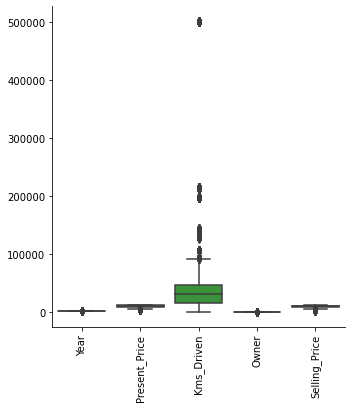

In [6]:
# Visualize the data in a boxplot to spot the outliers
sns.catplot(data=data, kind='box')
plt.xticks(rotation=90)
plt.show()

The data on the kiletres driven (Kms_Driven) seems to many outliers, but understandable.

# Business Questions

## i) the total number of cars in its collection

In [84]:
# get the total of cars
data['Car_Name'].count()

93065

There a total of 93065 cars in the fleet of the car vehicles

## ii) the number of cars belonging to a particular type

In [87]:
# get the unique car numbers
data.nunique()

Car_Name            98
Year                16
Present_Price    74095
Kms_Driven       53305
Fuel_Type            3
Seller_Type          2
Transmission         2
Owner                3
Selling_Price    59623
dtype: int64

98 unique cars names

## iii) the minimum present price for each car belonging to a particular type

In [7]:
# group the data by Car_Name
# get the minimum present price
# get the bottom 30 values in ascending order
min_price_10=data.groupby('Car_Name', as_index=False)[['Present_Price']].min()
print(min_price_10.head(30).sort_values(by='Present_Price', ascending=True))

                    Car_Name  Present_Price
0                        800       3405.280
24                 Hero Hunk       5301.750
29       Hero Super Splendor       5306.570
14          Bajaj Pulsar 150       5313.750
18          Hero  CBZ Xtreme       6704.787
15        Bajaj Pulsar 220 F       6704.940
7     Bajaj Avenger 220 dtsi       6705.950
1                  Activa 3g       6706.520
16       Bajaj Pulsar NS 200       8300.990
13       Bajaj Pulsar 135 LS       8301.640
9         Bajaj Discover 100       8302.470
20              Hero Extreme       8303.787
12      Bajaj Pulsar  NS 200       8305.990
10        Bajaj Discover 125       8306.570
23    Hero Honda Passion Pro       8309.510
21              Hero Glamour       8310.570
19        Hero  Ignitor Disc       8310.650
22    Hero Honda CBZ extreme       8311.787
8   Bajaj Avenger Street 220       8321.950
2                  Activa 4g      10300.510
11         Bajaj Dominar 400      10301.600
27        Hero Splender Plus    

<Figure size 1080x360 with 0 Axes>

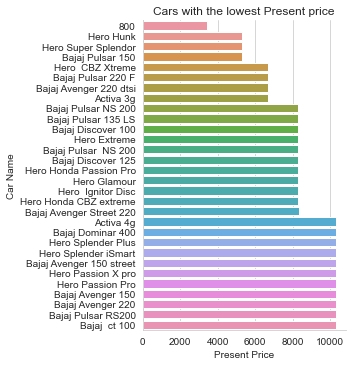

In [6]:
#Visualize the results in a bar chart

plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.catplot(data=min_price_10.head(30).sort_values(by='Present_Price', ascending=True), 
            y='Car_Name', 
            x='Present_Price',
           kind='bar')
plt.xlabel('Present Price')
plt.ylabel('Car Name')
plt.title('Cars with the lowest Present price')
plt.show()

## iii) the maximum present price for each car belonging to a particular type

                   Car_Name  Present_Price
3             Bajaj  ct 100       12699.32
7    Bajaj Avenger 220 dtsi       12697.95
1                 Activa 3g       12694.54
6         Bajaj Avenger 220       12688.95
2                 Activa 4g       12688.51
4         Bajaj Avenger 150       12680.80
5  Bajaj Avenger 150 street       12675.80
8  Bajaj Avenger Street 220       10696.95
9        Bajaj Discover 100       10676.47
0                       800        5793.28


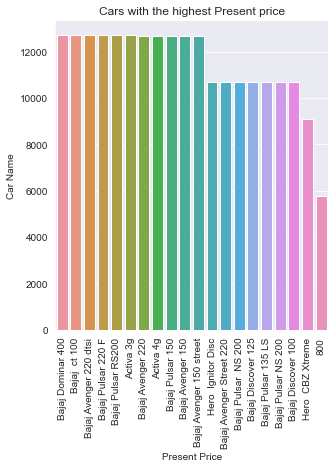

In [8]:
# group by car name and get the max price
max_price=data.groupby('Car_Name', as_index=False)[['Present_Price']].max()
# get the top 10 most expensive in descending order
print(max_price.head(10).sort_values(by='Present_Price', ascending=False))

#visualize the data in bar chat
sns.set_style('darkgrid')
sns.catplot(x='Car_Name', 
            y='Present_Price',  
            data=max_price.head(20).sort_values(by='Present_Price', ascending=False),
           kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Present Price')
plt.ylabel('Car Name')
plt.title('Cars with the highest Present price')
plt.show()

The results show that Bajaj ct 100 has the highest present price among the company's fleet of cars

## iv) the total present price for cars belonging to a particular type

                    Car_Name  Present_Price
6          Bajaj Avenger 220   1.198726e+07
14          Bajaj Pulsar 150   9.085197e+06
16       Bajaj Pulsar NS 200   7.836283e+06
1                  Activa 3g   6.174806e+06
10        Bajaj Discover 125   5.907122e+06
7     Bajaj Avenger 220 dtsi   5.839059e+06
15        Bajaj Pulsar 220 F   5.603333e+06
4          Bajaj Avenger 150   4.225526e+06
2                  Activa 4g   4.138172e+06
3              Bajaj  ct 100   4.057709e+06
11         Bajaj Dominar 400   3.876917e+06
17        Bajaj Pulsar RS200   3.657706e+06
5   Bajaj Avenger 150 street   3.651527e+06
13       Bajaj Pulsar 135 LS   2.795015e+06
12      Bajaj Pulsar  NS 200   2.713008e+06
19        Hero  Ignitor Disc   2.631347e+06
9         Bajaj Discover 100   2.445182e+06
8   Bajaj Avenger Street 220   2.443750e+06
18          Hero  CBZ Xtreme   1.922893e+06
0                        800   5.455158e+05


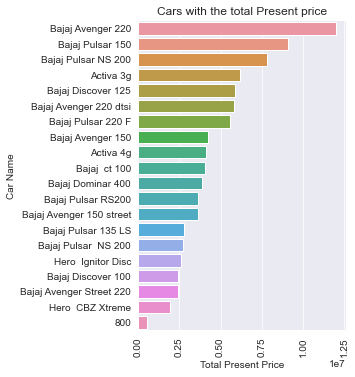

In [142]:
# group by car name and get the sum
sum_by_cartype = data.groupby('Car_Name', as_index=False)['Present_Price'].sum()
print(sum_by_cartype.head(20).sort_values(by = 'Present_Price', ascending = False))

#visualize the results
sns.catplot(x= 'Present_Price',
           y='Car_Name',
           data=sum_by_cartype.head(20).sort_values(by = 'Present_Price', ascending = False),
            kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Total Present Price')
plt.ylabel('Car Name')
plt.title('Cars with the total Present price')
plt.show()

## v) the total present price for the total number of cars in the collection

In [145]:
#Get the sum of the present price of the cars in the collection
data['Present_Price'].sum()

971614479.2719998

## vi) the minimum selling price for each car belonging to a particular type

                   Car_Name  Selling_Price
3             Bajaj  ct 100        9611.18
4         Bajaj Avenger 150        9607.75
6         Bajaj Avenger 220        9607.72
5  Bajaj Avenger 150 street        9604.60
2                 Activa 4g        9600.40
8  Bajaj Avenger Street 220        7621.45
9        Bajaj Discover 100        7602.27
1                 Activa 3g        6006.17
7    Bajaj Avenger 220 dtsi        6005.45
0                       800        2703.35


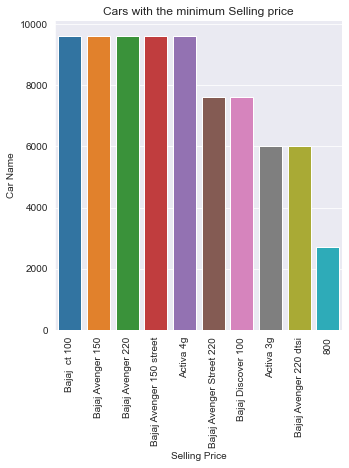

In [148]:
# group by car name and get the min price
min_price=data.groupby('Car_Name', as_index=False)[['Selling_Price']].min()
# get the top 10 most expensive in descending order
print(min_price.head(10).sort_values(by='Selling_Price', ascending=False))

#visualize the data in bar chat
sns.set_style('darkgrid')
sns.catplot(x='Car_Name', 
            y='Selling_Price',  
            data=min_price.head(10).sort_values(by='Selling_Price', ascending=False),
           kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Selling Price')
plt.ylabel('Car Name')
plt.title('Cars with the minimum Selling price')
plt.show()

                   Car_Name  Selling_Price
3             Bajaj  ct 100       11999.18
7    Bajaj Avenger 220 dtsi       11997.60
1                 Activa 3g       11994.45
6         Bajaj Avenger 220       11988.72
2                 Activa 4g       11988.40
4         Bajaj Avenger 150       11980.75
5  Bajaj Avenger 150 street       11975.60
8  Bajaj Avenger Street 220        9996.45
9        Bajaj Discover 100        9976.27
0                       800        5091.35


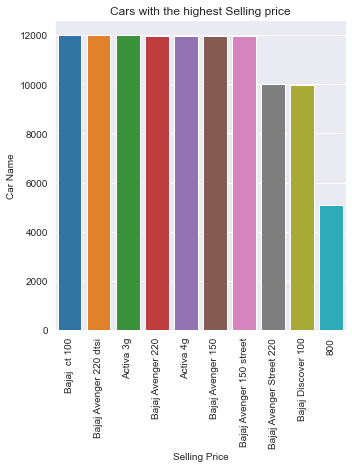

In [147]:
# group by car name and get the max price
max_selling=data.groupby('Car_Name', as_index=False)[['Selling_Price']].max()
# get the top 10 most expensive in descending order
print(max_selling.head(10).sort_values(by='Selling_Price', ascending=False))

#visualize the data in bar chat
sns.set_style('darkgrid')
sns.catplot(x='Car_Name', 
            y='Selling_Price',  
            data=max_selling.head(10).sort_values(by='Selling_Price', ascending=False),
           kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Selling Price')
plt.ylabel('Car Name')
plt.title('Cars with the highest Selling price')
plt.show()

## vii) the total selling price for the total number of cars in the collection

In [150]:
# get the sum selling price of the cars in the company collection
data['Selling_Price'].sum()

906213957.0100001

The total selling price of the cars in the company's is fleet is just over 906 million.

## viii) the total selling price for cars belonging to a particular type

               Car_Name  Selling_Price
69                 city    82685419.09
94                verna    40449124.14
71        corolla altis    40085670.86
66                 brio    33895636.90
68                 ciaz    33165828.95
..                  ...            ...
50    Suzuki Access 125     1502898.00
29  Hero Super Splendor     1040133.20
67                camry     1024929.50
24            Hero Hunk      959866.80
0                   800      463389.95

[98 rows x 2 columns]


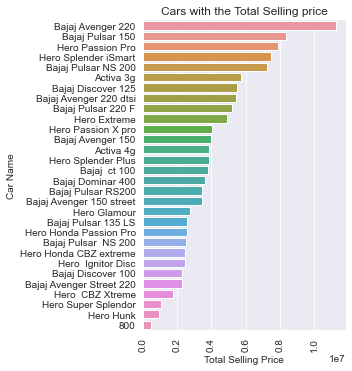

In [153]:
# group by car name and get the sum
sum_by_cartype = data.groupby('Car_Name', as_index=False)['Selling_Price'].sum()
print(sum_by_cartype.sort_values(by = 'Selling_Price', ascending = False))

#visualize the results
sns.catplot(x= 'Selling_Price',
           y='Car_Name',
           data=sum_by_cartype.head(30).sort_values(by = 'Selling_Price', ascending = False),
            kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Total Selling Price')
plt.ylabel('Car Name')
plt.title('Cars with the Total Selling price')
plt.show()

## ix) the most expensive car by present price

In [161]:
# get the most expensive car by present price
data[data.Present_Price == data.Present_Price.max()]

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
20597,fortuner,2017,12731.23,8495,Diesel,Dealer,Automatic,0,12028.0


The most expensive car by present price is Fortuner 2017 model

## x) the least expensive car by present price

In [160]:
# get the least expensive car by present price
data[data.Present_Price == data.Present_Price.min()]

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
70297,800,2003,3405.28,127103,Petrol,Individual,Manual,0,2703.35


The least expensive car by present price is 800 2003 model

## xi) the most expensive car by selling price

In [159]:
data[data.Selling_Price == data.Selling_Price.max()]

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
20597,fortuner,2017,12731.23,8495,Diesel,Dealer,Automatic,0,12028.0


## xii) the least expensive car by selling price

In [162]:
data[data.Selling_Price == data.Selling_Price.min()]

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
70297,800,2003,3405.28,127103,Petrol,Individual,Manual,0,2703.35


The 800 car model 2003 is the least expensive by selling price

## xiii) the mileage in kilometers covered by each car belonging to a particular type

Text(0.5, 1.0, 'Mileage by Car type')

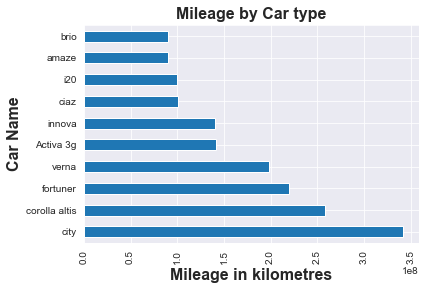

In [31]:
# group by car type and get the total mileage
type_mileage=data.groupby('Car_Name', as_index=True)['Kms_Driven'].sum()
type_mileage
ordered=type_mileage.sort_values(ascending=False)
# visualize
ordered.head(10).plot(kind = 'barh')
plt.xticks(rotation = 90)
plt.xlabel('Mileage in kilometres', fontsize=16, fontweight='bold')
plt.ylabel('Car Name', fontsize=16, fontweight='bold')
plt.title('Mileage by Car type', fontsize=16, fontweight='bold')


## xiv) the profit/loss incurred overtime

In [181]:
# create a profit/loss column
data['Profit/Loss']=data['Selling_Price'] - data['Present_Price']
data.head()

#get the total profit / loss for the who company fleet
data['Profit/Loss'].sum()

-65400522.26199998

The company will make a loss of over 65million incase all the cars were sold now.

## xv) how the present price and selling price progressed overtime.

      Present_Price  Selling_Price
Year                              
2003   1.094560e+06   9.298642e+05
2004   4.252406e+06   3.989391e+06
2005   5.097315e+06   4.544321e+06
2006   4.748572e+06   4.233455e+06
2007   2.102563e+06   1.877701e+06
2008   1.315196e+07   1.197690e+07
2009   1.089111e+07   9.917084e+06
2010   2.763586e+07   2.515216e+07
2011   5.199641e+07   4.814719e+07
2012   6.272203e+07   5.808000e+07
2013   9.042071e+07   8.373877e+07
2014   1.039900e+08   9.629614e+07
2015   2.465426e+08   2.314894e+08
2016   2.035206e+08   1.911257e+08
2017   1.395813e+08   1.310841e+08
2018   3.866479e+06   3.631785e+06


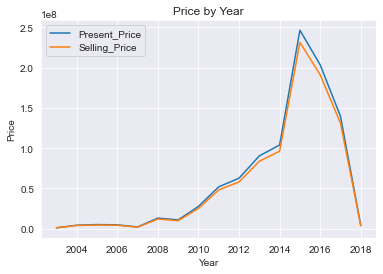

In [203]:
#group the prices by year
yearly_price=data.groupby('Year', as_index=True)[['Present_Price', 'Selling_Price']].sum()
print(yearly_price)

# visualize
yearly_price.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price by Year')
plt.legend()
plt.show()

In [30]:
# let's get the car numbers by type
car_numbers=data.groupby('Car_Name')['Car_Name'].count()
car_numbers_ordered=car_numbers.sort_values(ascending=False)
print(car_numbers_ordered.head(20))

Car_Name
city                         8919
corolla altis                4852
verna                        4570
fortuner                     3550
brio                         3526
ciaz                         3363
grand i10                    3117
i20                          2974
innova                       2815
jazz                         2569
Royal Enfield Classic 350    2504
amaze                        2413
ertiga                       2212
eon                          2148
sx4                          1610
alto k10                     1596
swift                        1591
i10                          1540
Royal Enfield Thunder 350    1416
etios liva                   1247
Name: Car_Name, dtype: int64


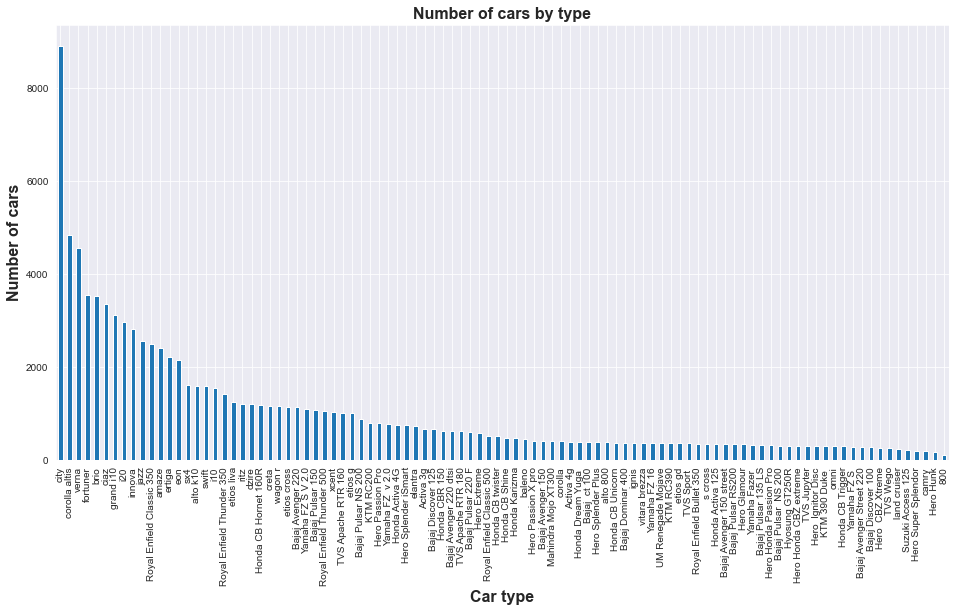

In [28]:
#plot the results in bar bar chart 
plt.figure(figsize=(16,8))
car_numbers_ordered.plot(kind='bar')
plt.xlabel('Car type', fontsize=16, fontweight='bold')
plt.ylabel('Number of cars', fontsize=16, fontweight='bold')
plt.title('Number of cars by type', fontsize=16, fontweight='bold')
plt.show()